In [6]:
from denseNet.pipeline import get_study_level_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [36]:
study_types = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']
study_types_lower = ['Hand', 'Shoulder', 'Elbow', 'Wrist', 'Finger', 'Forearm']
base_dir = "MURA-v1.1" # path to MURA-v1.1 folder

df_train = pd.DataFrame()
df_valid = pd.DataFrame()



## Generate Data

In [37]:
for study_type in study_types:
    data = get_study_level_data(study_type, base_dir)
    df_train_per_study = data['train']
    df_train_per_study['study_type'] = study_type
    df_train_per_study['patient_num'] = df_train_per_study['Path'].apply(lambda x: x.split(os.sep)[-3].replace('patient', ''))
    df_train_per_study['study_num'] = df_train_per_study['Path'].apply(lambda x: x.split(os.sep)[-2].replace('study', ''))
    df_train = pd.concat([df_train, df_train_per_study])


    df_valid_per_study = data['valid']
    df_valid_per_study['study_type'] = study_type
    df_valid_per_study['patient_num'] = df_valid_per_study['Path'].apply(lambda x: x.split(os.sep)[-3].replace('patient', ''))
    df_valid_per_study['study_num'] = df_valid_per_study['Path'].apply(lambda x: x.split(os.sep)[-2].replace('study', ''))
    df_valid = pd.concat([df_valid, df_valid_per_study])


100%|██████████| 207/207 [00:00<00:00, 423.26it/s]


In [38]:
df_valid['study_type'] = df_valid['study_type'].apply(lambda x: x.split('_')[1].title())
df_train['study_type'] = df_train['study_type'].apply(lambda x: x.split('_')[1].title())

## Class Distribution

In [40]:
positive_And_total_studies_df = pd.DataFrame()
for study_type in study_types_lower:
    train = df_train[df_train['study_type'] == study_type]
    valid = df_valid[df_valid['study_type'] == study_type]
    train_pos = train[train['Label'] == 1]
    valid_pos = valid[valid['Label'] == 1]
    positive_And_total_studies_df = positive_And_total_studies_df.append({'study_type': study_type,
                            'train_positive': len(train_pos),
                            'train_total': len(train),
                            'valid_positive': len(valid_pos),
                            'valid_total': len(valid)}, ignore_index=True)


C:\Users\User\AppData\Local\Temp\ipykernel_19344\1003408085.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positive_And_total_studies_df = positive_And_total_studies_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1003408085.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positive_And_total_studies_df = positive_And_total_studies_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1003408085.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positive_And_total_studies_df = positive_And_total_studies_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1003408085.py:7: FutureWarning: The frame.append method is d

In [41]:
positive_And_total_studies_df = positive_And_total_studies_df.set_index('study_type')
positive_And_total_studies_df

,train_positive,train_total,valid_positive,valid_total
study_type,,,,
Hand,521,2018,66,167
Shoulder,1457,2821,95,194
Elbow,660,1754,66,158
Wrist,1326,3460,97,237
Finger,655,1935,83,175
Forearm,287,877,64,133


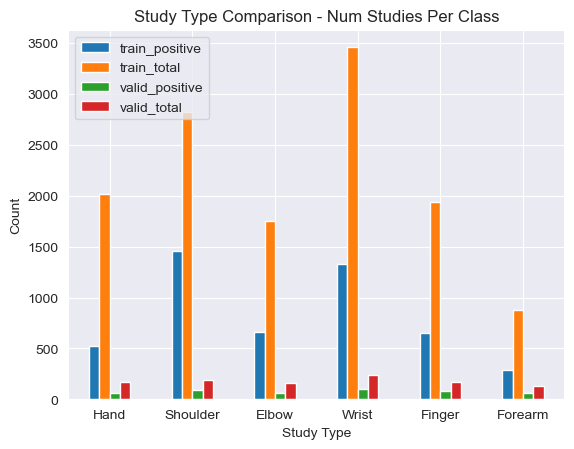

In [42]:
# Plotting the grouped bar plot
positive_And_total_studies_df.plot(kind='bar')
plt.xlabel('Study Type')
plt.ylabel('Count')
plt.title('Study Type Comparison - Num Studies Per Class')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()

### Class Distribution Ratio

In [43]:
positive_And_total_studies_df['train_class_ratio'] = positive_And_total_studies_df['train_positive'] / positive_And_total_studies_df['train_total']
positive_And_total_studies_df['valid_class_ratio'] = positive_And_total_studies_df['valid_positive'] / positive_And_total_studies_df['valid_total']

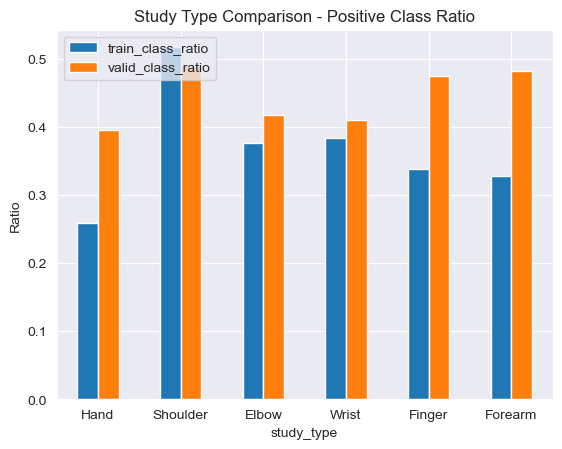

In [44]:
positive_And_total_studies_df[['train_class_ratio', 'valid_class_ratio']].plot(kind='bar')
plt.ylabel('Ratio')
plt.title('Study Type Comparison - Positive Class Ratio')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()


In [45]:
positive_And_total_studies_df[['train_class_ratio', 'valid_class_ratio']]

,train_class_ratio,valid_class_ratio
study_type,,
Hand,0.258176,0.395210
Shoulder,0.516484,0.489691
Elbow,0.376283,0.417722
Wrist,0.383237,0.409283
Finger,0.338501,0.474286
Forearm,0.327252,0.481203


## Images per Study

In [46]:
images_per_study_df = pd.DataFrame()
for study_type in study_types_lower:
    train = df_train[df_train['study_type'] == study_type]
    valid = df_valid[df_valid['study_type'] == study_type]
    avg_count_train = train['Count'].mean()
    avg_count_valid = valid['Count'].mean()
    images_per_study_df = images_per_study_df.append({'study_type': study_type,
                            'train_avg_count': avg_count_train,
                            'valid_avg_count': avg_count_valid}, ignore_index=True)

images_per_study_df = images_per_study_df.set_index('study_type')

C:\Users\User\AppData\Local\Temp\ipykernel_19344\1025080322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_df = images_per_study_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1025080322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_df = images_per_study_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1025080322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_df = images_per_study_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\1025080322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

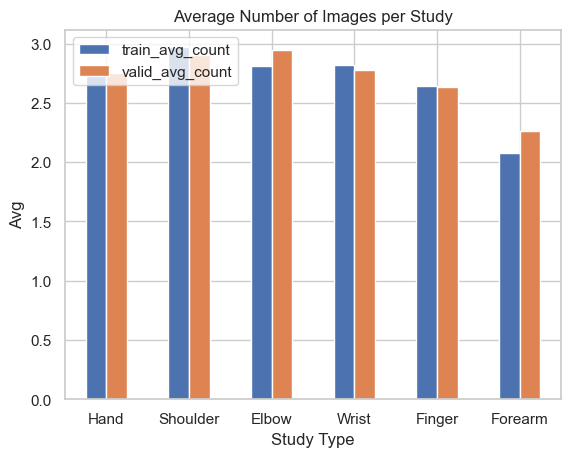

In [47]:
sns.set(style='whitegrid')
images_per_study_df.plot(kind='bar')
plt.xlabel('Study Type')
plt.ylabel('Avg')
plt.title('Average Number of Images per Study')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()

### Images per Study/Label

In [48]:
images_per_study_label_df = pd.DataFrame()
for study_type in study_types_lower:
    train = df_train[df_train['study_type'] == study_type]
    valid = df_valid[df_valid['study_type'] == study_type]
    avg_count_train_positive = train[train['Label'] == 1]['Count'].mean()
    avg_count_train_negative = train[train['Label'] == 0]['Count'].mean()

    avg_count_valid_positive = valid[valid['Label'] == 1]['Count'].mean()
    avg_count_valid_negative = valid[valid['Label'] == 0]['Count'].mean()


    images_per_study_label_df = images_per_study_label_df.append({'study_type': study_type,
                            'train_pos_avg_count': avg_count_train_positive,
                            'train_neg_avg_count': avg_count_train_negative,
                            'valid_pos_avg_count': avg_count_valid_positive,
                            'valid_neg_avg_count': avg_count_valid_negative}, ignore_index=True)


C:\Users\User\AppData\Local\Temp\ipykernel_19344\2639893980.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_label_df = images_per_study_label_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\2639893980.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_label_df = images_per_study_label_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\2639893980.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_per_study_label_df = images_per_study_label_df.append({'study_type': study_type,
C:\Users\User\AppData\Local\Temp\ipykernel_19344\2639893980.py:12: FutureWarning: The frame.append method is deprecated and will b

In [53]:
images_per_study_label_df.set_index('study_type', inplace=True)
images_per_study_label_df

,train_pos_avg_count,train_neg_avg_count,valid_pos_avg_count,valid_neg_avg_count
study_type,,,,
Hand,2.848369,2.711423,2.863636,2.683168
Shoulder,2.860673,3.087243,2.926316,2.878788
Elbow,3.039394,2.673675,3.484848,2.554348
Wrist,3.006787,2.701500,3.041237,2.600000
Finger,3.004580,2.451563,2.975904,2.326087
Forearm,2.303136,1.972881,2.359375,2.173913


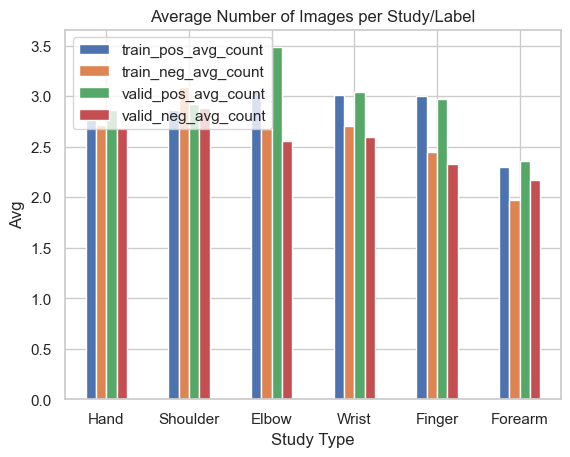

In [54]:
sns.set(style='whitegrid')
images_per_study_label_df.plot(kind='bar')
plt.xlabel('Study Type')
plt.ylabel('Avg')
plt.title('Average Number of Images per Study/Label')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()


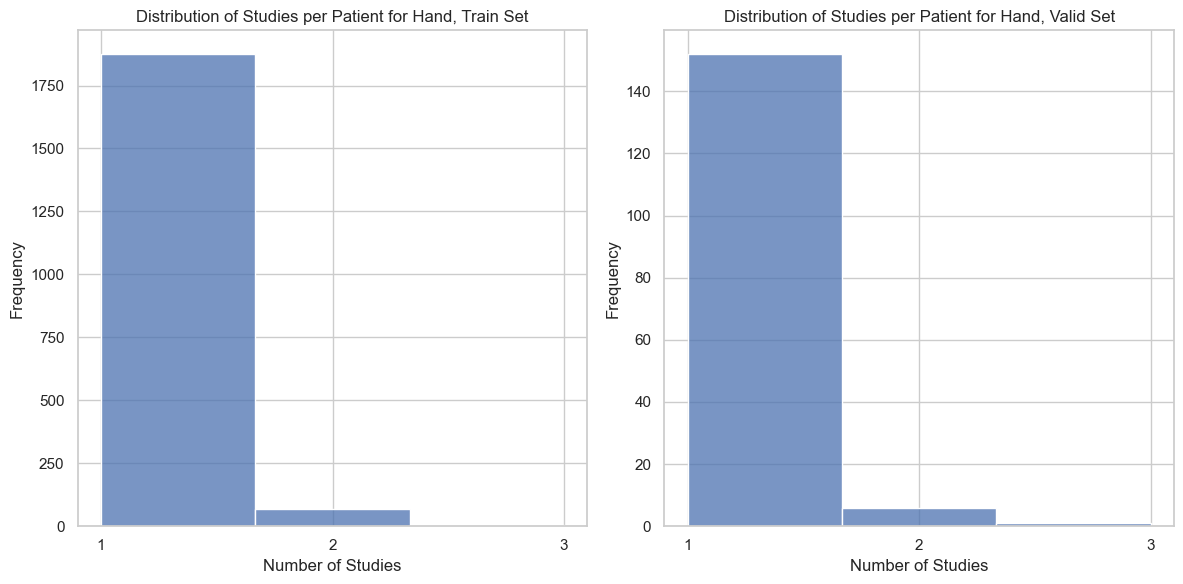

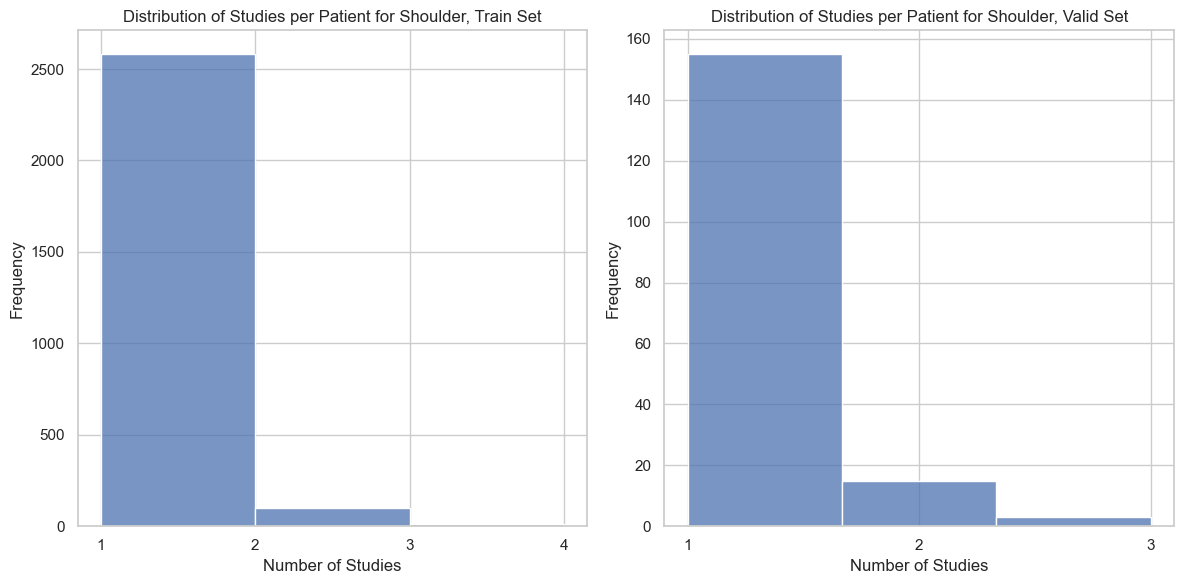

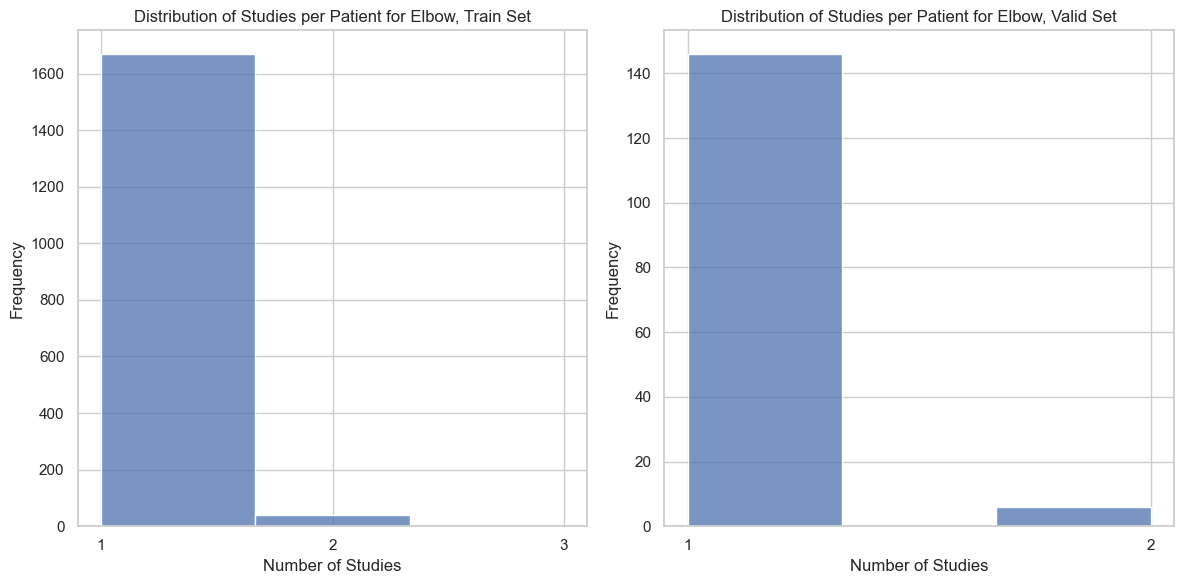

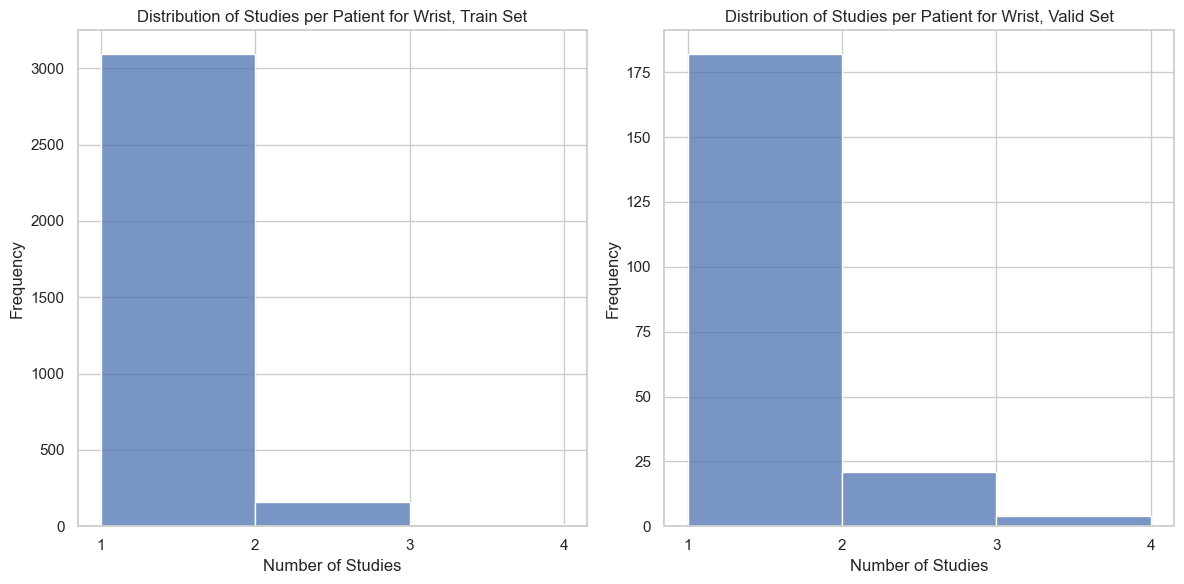

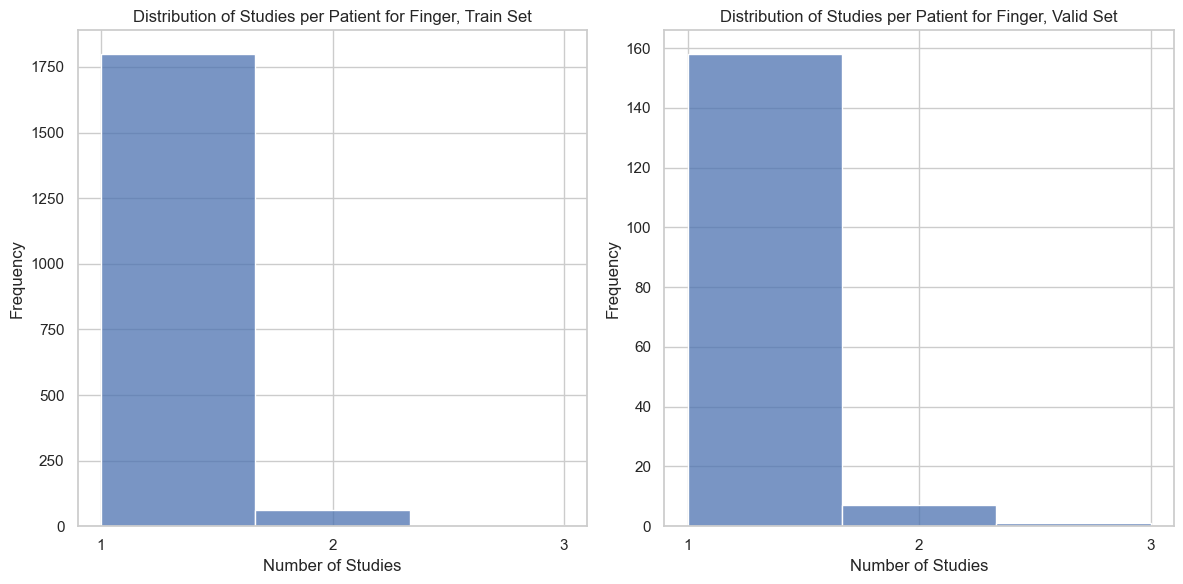

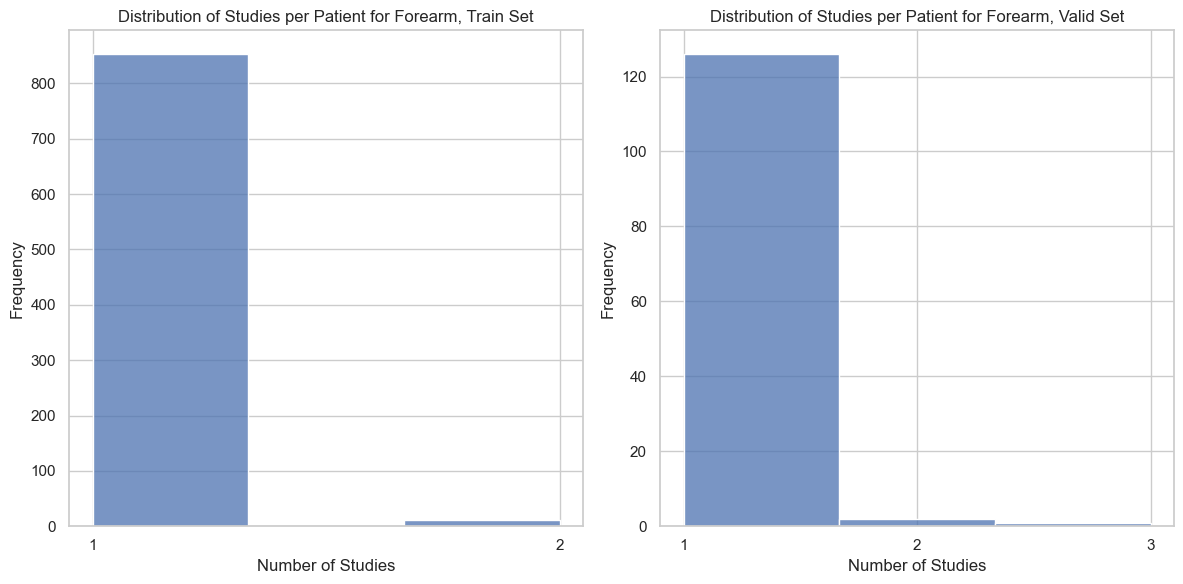

In [51]:
enum_dict = {0: "train", 1: "valid"}
for study_type in study_types_lower:
    train = df_train[df_train['study_type'] == study_type]
    valid = df_valid[df_valid['study_type'] == study_type]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for train and valid subplots

    for i, df in enumerate([train, valid]):
        studies_per_person = df.groupby('patient_num')['study_num'].nunique()

        sns.histplot(studies_per_person, bins=3, ax=axs[i])
        axs[i].set_xlabel('Number of Studies')
        axs[i].set_ylabel('Frequency')
        axs[i].set_xticks(range(int(studies_per_person.min()), int(studies_per_person.max()) + 1))
        axs[i].set_title(f'Distribution of Studies per Patient for {study_type.title()}, {enum_dict[i].title()} Set')

    plt.tight_layout()
    plt.show()
